# 1. Coding Part

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
import numpy as np


## Task 1.1 Playing with quatum circuits

In [2]:
# Code here

# 1.

## Numpy implimentasjon 
# Definer |L> = |0> og |R> = |1>
ket_L = np.array([1, 0])  # |L> = |0>
ket_R = np.array([0, 1])  # |R> = |1>

# Tensorprodukt av |RRLL> = |R> ⊗ |R> ⊗ |L> ⊗ |L>
ket_RRLL = np.kron(np.kron(ket_R, ket_R), np.kron(ket_L, ket_L))

# Tensorprodukt av |LLRR> = |L> ⊗ |L> ⊗ |R> ⊗ |R>
ket_LLRR = np.kron(np.kron(ket_L, ket_L), np.kron(ket_R, ket_R))

# Superposisjonsvektor |ψ> = 1/sqrt(2) * (|RRLL> - i * |LLRR>)
# Merk at vi inkluderer den imaginære enheten i
psi = (1/np.sqrt(2)) * (ket_RRLL - 1j * ket_LLRR)

# Lag en quantum circuit med 4 qubits
qc_combined = QuantumCircuit(4)

# Fyll inn statevectoren i Qiskit Statevector for å få latex
statevector = Statevector(psi)

# Tegn statevectoren i LaTeX-format
statevector.draw('latex')


## Circuit
# Create a quantum circuit with 4 qubits

qc = QuantumCircuit(4)

# Create a superposition
qc.h(0)  # Hadamard on qubit 0

# Entangle qubits for |RRLL> and |LLRR> states
qc.cx(0, 1)  # Control-X (CNOT) between qubit 0 and qubit 1
qc.cx(0, 2)  # Control-X (CNOT) between qubit 0 and qubit 2
qc.cx(0, 3)  # Control-X (CNOT) between qubit 0 and qubit 3

# Apply X-gates to swap the basis states
qc.x(2)
qc.x(3)

# 2.

# 3.

## Task 1.2 Quatum State Tomography

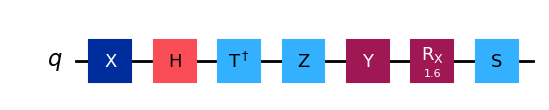

In [3]:
# Code here

# 1.
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.tdg(0) # tdg - (T-dagger) porten
qc.z(0)
qc.y(0)
qc.rx(1.6,0)
qc.s(0)

qc.draw('mpl', reverse_bits=True)


In [19]:
# 2.
## Statevector er en representasjon av en kvantetilstand i form av en vektor i et komplekst Hilbert-rom.
statevector = Statevector(qc)
statevector.draw('latex')


'Statevector([ 0.158894  -0.34835335j, -0.85132408-0.35867805j],\n            dims=(2,))'

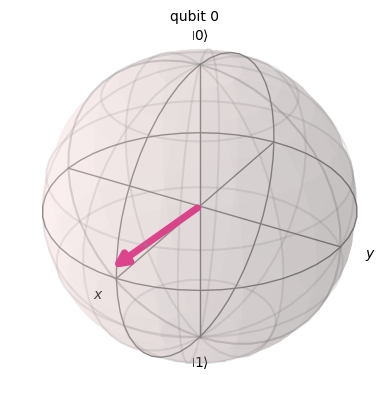

In [30]:
# Plot qc vectors on Bloch Sphere
plot_bloch_multivector(statevector)



In [41]:
# 3. Measurment

backend = AerSimulator()

## Measure in Z-basis
qc_z = qc.copy()
qc_z.measure_all()
results = backend.run(qc_z, shots=1000).result()
counts_z = results.get_counts()
print('Measurment in Z-baisi: {}'.format(counts_z))

Measurment in Z-baisi: {'0': 134, '1': 866}


In [42]:
## Measure in X-basis
qc_x = qc.copy()
qc_x.h(0)  # Hadamard-port for å endre til X-basis
qc_x.measure_all() 

results = backend.run(qc_x, shots=1000).result()
counts_x = results.get_counts()
print('Measurment in X-baisi: {}'.format(counts_x))

Measurment in X-baisi: {'1': 512, '0': 488}


In [43]:
## Measure in Y-basis

qc_y = qc.copy()
qc_y.sdg(0)
qc_y.h(0)
qc_y.measure_all()

results = backend.run(qc_y, shots=1000).result()
counts_y = results.get_counts()
print('Measurment in Y-baisi: {}'.format(counts_y))

Measurment in Y-baisi: {'0': 151, '1': 849}


# 4

- Målet er å beregne sannsynlighetsamplitudene $r$, $s$, og fasen $α$, som beskriver den ukjente kvantetilstanden $∣ψ⟩$. 
- Vi kan bruke måle resultatene fra oppgave 1.3 til å estimere r og s.
    - $r$: Amplituden for tilstanden $\ket{0}$
    - $s$: Amplituden for tilstanden $\ket{1}$
- Formelen er: $\ket{\psi}=r\ket{0} + se^{i\alpha} \ket{1}$ 

In [46]:
def recontruct_state(z_counts, x_counts, y_counts, shots_number):
    # Basis-tilstandene
    ket_0 = np.array([1,0])
    ket_1 = np.array([0,1])

    # Beregn r og s fra Z-basis målingene
    r = np.sqrt(z_counts['0']/shots_number)
    s = np.sqrt(z_counts['1']/shots_number)
    
    # Beregn cos(α) fra X-basis målingene
    plus_x = x_counts['0']  # |+> målt som 0
    minus_x = x_counts['1']  # |-> målt som 1
    cos_alpha = (plus_x - minus_x) / shots_number
    
    # Beregn sin(α) fra Y-basis målingene
    plus_y = y_counts['0']  # |i> målt som 0
    minus_y = y_counts['1']  # |-i> målt som 1
    sin_alpha = (plus_y - minus_y) / shots_number
    
    # Beregn α vinkelen
    alpha = np.arctan2(sin_alpha, cos_alpha)
    
    # Rekonstruer tilstanden ved å fylle formelen
    reconstructed_state = r * ket_0 + s * (np.exp(1j * alpha) * ket_1)
    
    return reconstructed_state


recontruct_state(counts_z, counts_x, counts_y, 1000)

array([ 0.3660601 +0.j       , -0.03197851-0.9300416j])